In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [6]:
cd /content/drive/My\ Drive/Colab\ Notebooks/dw_matrix

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [20]:
ls data

men_shoes.csv  men_shoes_prices.csv


In [21]:
df =pd.read_csv('data/men_shoes_prices.csv', low_memory=False)
df.shape

(18280, 48)

In [23]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [25]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [27]:
y_true = df['prices_amountmin']
y_true.shape[0]
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

63.968341227870624

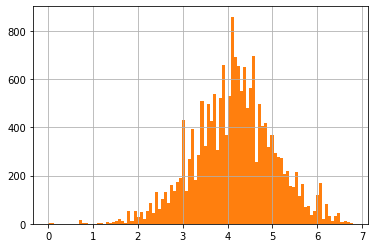

In [30]:
#np.log( df['prices_amountmin']+1).hist(bins=100)
# to samo co zeby np.log(0) nie dawał błędu
np.log1p(df['prices_amountmin']).hist(bins=100)

In [31]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [32]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true)) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [33]:
df.brand.value_counts()

Nike                1709
PUMA                 574
Ralph Lauren         524
New Balance          361
VANS                 356
                    ... 
Saddle Tramp           1
Handmadecraft          1
JACK SPADE             1
RCS                    1
Ralph Lauren RRL       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat']=df['brand'].factorize()[0]

In [38]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [43]:
feats =['brand_cat']
X = df [ feats ].values
y = df ['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df [ feats ].values
  y = df ['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [45]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [46]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0]
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [49]:
run_model(['manufacturer_cat', 'brand_cat' ])

(-58.53930419908596, 4.311223231615436)

In [60]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    day3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../day3.ipynb
	../day4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [68]:
!git config --global user.email "pkassin@gmail.com"
!git config --global user.name "Piotr Kassin"
!git commit -a -m "Day4 reorganize"

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
	day3.ipynb
	day4.ipynb

nothing added to commit but untracked files present


In [0]:
!git push -u origin master

Counting objects: 2, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (2/2), 217 bytes | 108.00 KiB/s, done.
Total 2 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/djsuszi/dw_matrix.git
   63f5f17..2c1bc86  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [0]:
!git status